<a href="https://colab.research.google.com/github/LailaBulh/Programacion---Claas-Files/blob/main/Tarea_SVM_Clases_No_Balanceadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Tarea: Clasificación con SVM en un contexto de Clases No Balanceadas

**Nivel:** Maestría  
**Duración estimada:** 2-3 horas  
**Herramientas:** Python, Scikit-Learn, imbalanced-learn, Matplotlib, Google Colab  
**Temas clave:**  
- Clasificación con SVM  
- Clases no balanceadas  
- Validación cruzada estratificada  
- Métricas adaptadas a desbalance  
- SMOTE y otras técnicas de remuestreo


## 🧾 Objetivos de aprendizaje

Al finalizar esta tarea, el estudiante será capaz de:

- Identificar los efectos del desbalance de clases en modelos clasificadores.
- Implementar una SVM en un escenario multiclase o binario con fuerte desbalance.
- Evaluar el rendimiento del modelo usando métricas robustas como recall, F1, y G-mean.
- Aplicar técnicas como SMOTE y comparar su impacto.
- Utilizar `StratifiedKFold` para asegurar la adecuada evaluación del modelo.


## 1. **Carga y exploración del dataset**




In [61]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix


In [62]:
### Carga de dataset
dataset = load_breast_cancer()

#dataset

In [63]:
### Distribucion de clases

X, y = dataset.data, dataset.target

unique, counts = np.unique(y, return_counts= True)
distribucion = dict(zip(dataset.target_names, counts))

print(f'La distribución de cada clase es: {distribucion}')


La distribución de cada clase es: {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


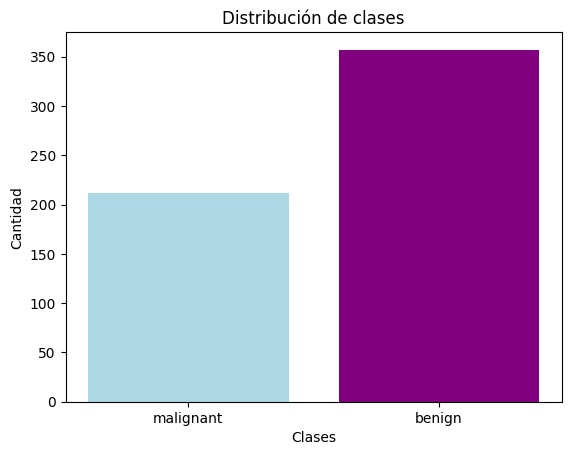

In [64]:
### Visualizacion de clases
colors = ['lightblue', 'purple']

fig, ax = plt.subplots()
ax.bar(distribucion.keys(), distribucion.values(), color = colors)
ax.set_xlabel('Clases')
ax.set_ylabel('Cantidad')
ax.set_title('Distribución de clases')
#ax.legend('Clases')
plt.show()



## 2. **Entrenamiento base con SVM**


In [65]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import precision_recall_fscore_support, classification_report

#from sklearn.datasets import make_circles


In [66]:
### Modelo SVM con kernel RBF
SVC_Gaussian = SVC(kernel='rbf', gamma= 'scale', C=1)

### Aplicar StratifiedkFold con 5 particiones
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### listas para acumular métricas
precisions, recalls, f1s = [], [], []

### Validación cruzada
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

### Entrenamiento
    SVC_Gaussian.fit(X_train, y_train)
    y_pred = SVC_Gaussian.predict(X_test)

### Metricas por clase
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[0,1])
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

### Resultado por clase
    print(classification_report(y_test, y_pred, target_names=dataset.target_names))



              precision    recall  f1-score   support

   malignant       0.95      0.88      0.92        43
      benign       0.93      0.97      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114

              precision    recall  f1-score   support

   malignant       0.94      0.72      0.82        43
      benign       0.85      0.97      0.91        71

    accuracy                           0.88       114
   macro avg       0.90      0.85      0.86       114
weighted avg       0.88      0.88      0.87       114

              precision    recall  f1-score   support

   malignant       1.00      0.71      0.83        42
      benign       0.86      1.00      0.92        72

    accuracy                           0.89       114
   macro avg       0.93      0.86      0.88       114
weighted avg       0.91      0.89      0.89       114

              preci

In [67]:
### Metricas pormedio por clase

precision_avg = np.mean(precisions, axis= 0)
recall_avg = np.mean(recalls, axis= 0)
f1_avg = np.mean(f1s, axis= 0)


### Metricas promedio
print('Metricas promedio')
print(f'Precision= {precision_avg.mean():.3f}, Recall={recall_avg.mean():.3f}, F1={f1_avg.mean():.3f}')

### Metricas promedio por clase
print('\nMetricas promedio por clase')
for i, cls in enumerate(dataset.target_names):
    print(f"{cls}: Precision={precision_avg[i]:.3f}, Recall={recall_avg[i]:.3f}, F1={f1_avg[i]:.3f}")

Metricas promedio
Precision= 0.929, Recall=0.891, F1=0.904

Metricas promedio por clase
malignant: Precision=0.963, Recall=0.802, F1=0.872
benign: Precision=0.895, Recall=0.980, F1=0.935


## 3. **Análisis del problema de desbalance**


   - Interpreta las métricas: ¿qué clase tiene peor desempeño? ¿por qué?

La clase con peor desempeño es "malignat" pues tiene menos datos para entrenar el modelo, al comparar el valor de f1-score entre clases, "malignant" siempre tuvo un valor menor de accuracy.


   - Reporta matriz de confusión promedio.


In [68]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Modelo sin tratamiento de desbalance:
              precision    recall  f1-score   support

           0      1.000     0.786     0.880        42
           1      0.887     1.000     0.940        71

    accuracy                          0.920       113
   macro avg      0.944     0.893     0.910       113
weighted avg      0.929     0.920     0.918       113



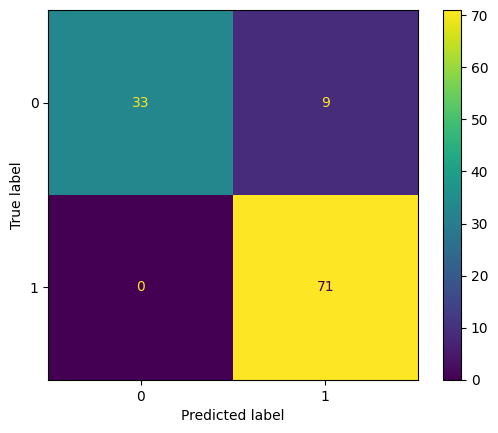

In [69]:
print("Modelo sin tratamiento de desbalance:")
print(classification_report(y_test, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Interpretación:

De las 71 muestras de clase 1 (benign) el algoritmo clasifico correctamente las 71 muestras.

Para el caso de clase 0 (malignant) el algoritmo que contaba con 42 muestras para el test, solo clasifico 33 correctamente y clasifico 9 falsos positivos.

## 4. **Aplicación de SMOTE**
   - Aplica `SMOTE` solo al conjunto de entrenamiento dentro de cada fold.
   - Entrena nuevamente la SVM.
   - Compara métricas antes y después.



In [70]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import make_scorer, recall_score
from imblearn.pipeline import Pipeline as ImbPipeline



In [71]:
scorers = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'recall_0': make_scorer(recall_score, pos_label=0),
    'recall_1': make_scorer(recall_score, pos_label=1)
}

pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', SVC_Gaussian)
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(pipeline, X, y, scoring=scorers, cv=cv)

Evaluación con SMOTE usando Stratified K-Fold Cross-Validation
Accuracy por fold: [0.89473684 0.90350877 0.88596491 0.90350877 0.92920354]
Precision macro por fold: [0.88504287 0.91452991 0.88750439 0.89277865 0.94065657]
Recall macro por fold: [0.89715034 0.88126433 0.86507937 0.91369048 0.90962441]
Recall clase 0 por fold: [0.90697674 0.79069767 0.78571429 0.95238095 0.83333333]
Recall clase 1 por fold: [0.88732394 0.97183099 0.94444444 0.875      0.98591549]
F1 macro por fold: [0.88985507 0.893467   0.87409736 0.89941445 0.92169092]

Promedios:
Accuracy promedio: 0.9033845676137245
Precision macro promedio: 0.9041024776729989
Recall macro promedio: 0.8933617857012879
Recall clase 0 promedio: 0.8538205980066443
Recall clase 1 promedio: 0.9329029733959313
F1 macro promedio: 0.8957049602769553


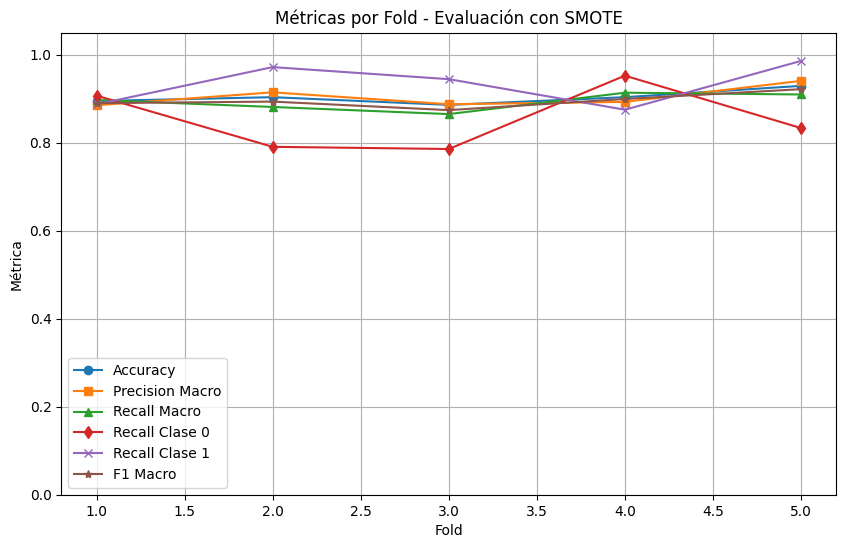

In [72]:
print("Evaluación con SMOTE usando Stratified K-Fold Cross-Validation")
print("Accuracy por fold:", scores['test_accuracy'])
print("Precision macro por fold:", scores['test_precision_macro'])
print("Recall macro por fold:", scores['test_recall_macro'])
print("Recall clase 0 por fold:", scores['test_recall_0'])
print("Recall clase 1 por fold:", scores['test_recall_1'])
print("F1 macro por fold:", scores['test_f1_macro'])

print("\nPromedios:")
print("Accuracy promedio:", scores['test_accuracy'].mean())
print("Precision macro promedio:", scores['test_precision_macro'].mean())
print("Recall macro promedio:", scores['test_recall_macro'].mean())
print("Recall clase 0 promedio:", scores['test_recall_0'].mean())
print("Recall clase 1 promedio:", scores['test_recall_1'].mean())
print("F1 macro promedio:", scores['test_f1_macro'].mean())

# Gráfica comparativa de métricas por fold
plt.figure(figsize=(10, 6))
folds = np.arange(1, 6)
plt.plot(folds, scores['test_accuracy'], label='Accuracy', marker='o')
plt.plot(folds, scores['test_precision_macro'], label='Precision Macro', marker='s')
plt.plot(folds, scores['test_recall_macro'], label='Recall Macro', marker='^')
plt.plot(folds, scores['test_recall_0'], label='Recall Clase 0', marker='d')
plt.plot(folds, scores['test_recall_1'], label='Recall Clase 1', marker='x')
plt.plot(folds, scores['test_f1_macro'], label='F1 Macro', marker='*')
plt.xlabel('Fold')
plt.ylabel('Métrica')
plt.title('Métricas por Fold - Evaluación con SMOTE')
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

## 5. **Visualización y conclusiones**
   - Usa un gráfico de barras comparando F1 por clase antes y después.
   - Comenta las ventajas y riesgos de aplicar SMOTE con SVM.
   - Explica cuándo conviene usar otras técnicas como `One-Sided Selection` o `ADASYN`.

## 📁 Entregables

- Google Colab Notebook con:
  - Código bien comentado
  - Gráficas solicitadas
  - Conclusiones reflexivas al final
- Exportación del notebook a PDF
